<a href="https://colab.research.google.com/github/Avelez164/Data-Science-Big-Data/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPSC 375 Classwork - K-Nearest Neighbors

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ProfAvery/cpsc375-classwork/blob/main/knn.ipynb)

- *Manager*:
- *Recorder*:
- *Presenter*:
- *Timekeeper*:

## Part 1 - Slide 22

* Compute the Euclidean distance between vectors
  - (5, 0, -1)
  - (7, 3,  5)
* Do it by hand
* Check with Python


math.sqrt((5 - 7)**2 + ( 0 - 3)**2 + (-1 - 5)**2)

In [1]:
import numpy as np
from scipy.spatial import distance
#?distance.euclidean
vector1 = np.array([5,0,-1])
vector2 = np.array([7,3,5])

euclidean_distance = distance.euclidean(vector1, vector2)
print(euclidean_distance)

7.0


In [2]:
#numpy
distance.euclidean(
    np.array([5,0,-1]),
    np.array([7,3,5])
)

np.float64(7.0)

* Consider this training data

|          | nchars | is_last_a | nvowels | **Output** |
|----------|--------|-----------|---------|------------|
| "Laura"  | 5      | 1         | 3       | **F**      |
| "Carlos" | 6      | 0         | 2       | **M**      |
| "Jose"   | 4      | 0         | 2       | **M**      |
| "Maria"  | 5      | 1         | 3       | **F**      |
| "Belen"  | 5      | 0         | 2       | **F**      |

`is_last_a`: 1 if last character is "a", 0 otherwise

* Using 1-NN, what is the predicted output name for "Chris"?


```
nchars('Chris') = 5
is_last_a('Chris') = 0
nvowels('Chris') = 1
```

Chris is represented by (5, 0, 1)

For 1-NN

* Using 3-NN, what is the predicted output name for "Chris"?


In [3]:
neighbors = [
  [5, 1, 3],
  [6, 0, 2],
  [4, 0, 2],
  [5, 1, 3],
  [5, 0, 2],

];

for neighbor in neighbors:
    distance_to_neighbor = distance.euclidean(np.array([5, 0, 1]), np.array(neighbor))
    print(f"Distance to neighbor {neighbor}: {distance_to_neighbor}")


Distance to neighbor [5, 1, 3]: 2.23606797749979
Distance to neighbor [6, 0, 2]: 1.4142135623730951
Distance to neighbor [4, 0, 2]: 1.4142135623730951
Distance to neighbor [5, 1, 3]: 2.23606797749979
Distance to neighbor [5, 0, 2]: 1.0


## Part 2 - Slide 27

The `pima-indians-diabetes-resampled.csv` file on Canvas contains a version of the Pima Indian Diabetes Database (PIDD). This dataset is often used to test machine learning algorithms, but it was not collected in a vacuum, and it is important to acknowledge [the background and the ethics issues it raises](https://nihrecord.nih.gov/2020/07/24/medical-history-matters-era-big-data). The subjects of the database are of Pima Indian heritage, and the dataset was originally collected as part of a longitudinal study of diabetes by the National Institutes of Health. The records in the dataset indicate whether the subjects have diabetes or not, along with certain diagnostic measurements.


In [5]:
import pandas as pd

pima_indians_diabetes = pd.read_csv(
    "https://raw.githubusercontent.com/ProfAvery/cpsc375-classwork/refs/heads/main/datasets/pima-indians-diabetes-resampled.csv"
)

In [6]:
pima_indians_diabetes

,Preg,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,HasDiabetes
0,2,157,74,35,440,39.4,0.134,30,0
1,7,159,64,0,0,27.4,0.294,40,0
2,7,83,78,26,71,29.3,0.767,36,0
3,0,124,56,13,105,21.8,0.452,21,0
4,5,99,54,28,83,34.0,0.499,30,0
...,...,...,...,...,...,...,...,...,...
763,7,81,78,40,48,46.7,0.261,42,0
764,6,125,78,31,0,27.6,0.565,49,1
765,3,130,78,23,79,28.4,0.323,34,1
766,1,116,78,29,180,36.1,0.496,25,0


The goal is to predict if a subject has diabetes, given some of the diagnostic measurements (only *Preg* and *Pedigree*)

* Which is the “class” variable? Which is/are the “feature” variables?

class: `HasDiabetes`

features: `Preg` and `Pedigree`

* Split the dataset into train and test datasets with the *first 500 rows* for training, and the remaining rows for test
  - Do NOT randomly sample the data


In [35]:
from sklearn.neighbors import KNeighborsClassifier

train = pima_indians_diabetes[:500]
test = pima_indians_diabetes[500:]

X_train = train.drop('HasDiabetes', axis=1)
y_train = train['HasDiabetes']

X_test = test.drop('HasDiabetes', axis=1)
y_test = test['HasDiabetes']


train.drop('HasDiabetes', axis=1)

,Preg,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age
0,2,157,74,35,440,39.4,0.134,30
1,7,159,64,0,0,27.4,0.294,40
2,7,83,78,26,71,29.3,0.767,36
3,0,124,56,13,105,21.8,0.452,21
4,5,99,54,28,83,34.0,0.499,30
...,...,...,...,...,...,...,...,...
495,1,79,75,30,0,32.0,0.396,22
496,1,100,72,12,70,25.3,0.658,28
497,1,157,72,21,168,25.6,0.123,24
498,0,119,64,18,92,34.9,0.725,23


* Train and test a 1-nearest neighbor (1-NN) classifier with this dataset
  - What is the error rate (number of misclassifications)?


In [45]:
from sklearn.neighbors import KNeighborsClassifier

mod = KNeighborsClassifier(n_neighbors=27)
mod.fit(X_train, y_train)

1 - mod.score(X_test, y_test)

0.2276119402985075

In [46]:
import math
math.sqrt(768)

27.712812921102035

In [50]:
import pandas as pd
from plotnine import ggplot, geom_line, aes
from sklearn.neighbors import KNeighborsClassifier


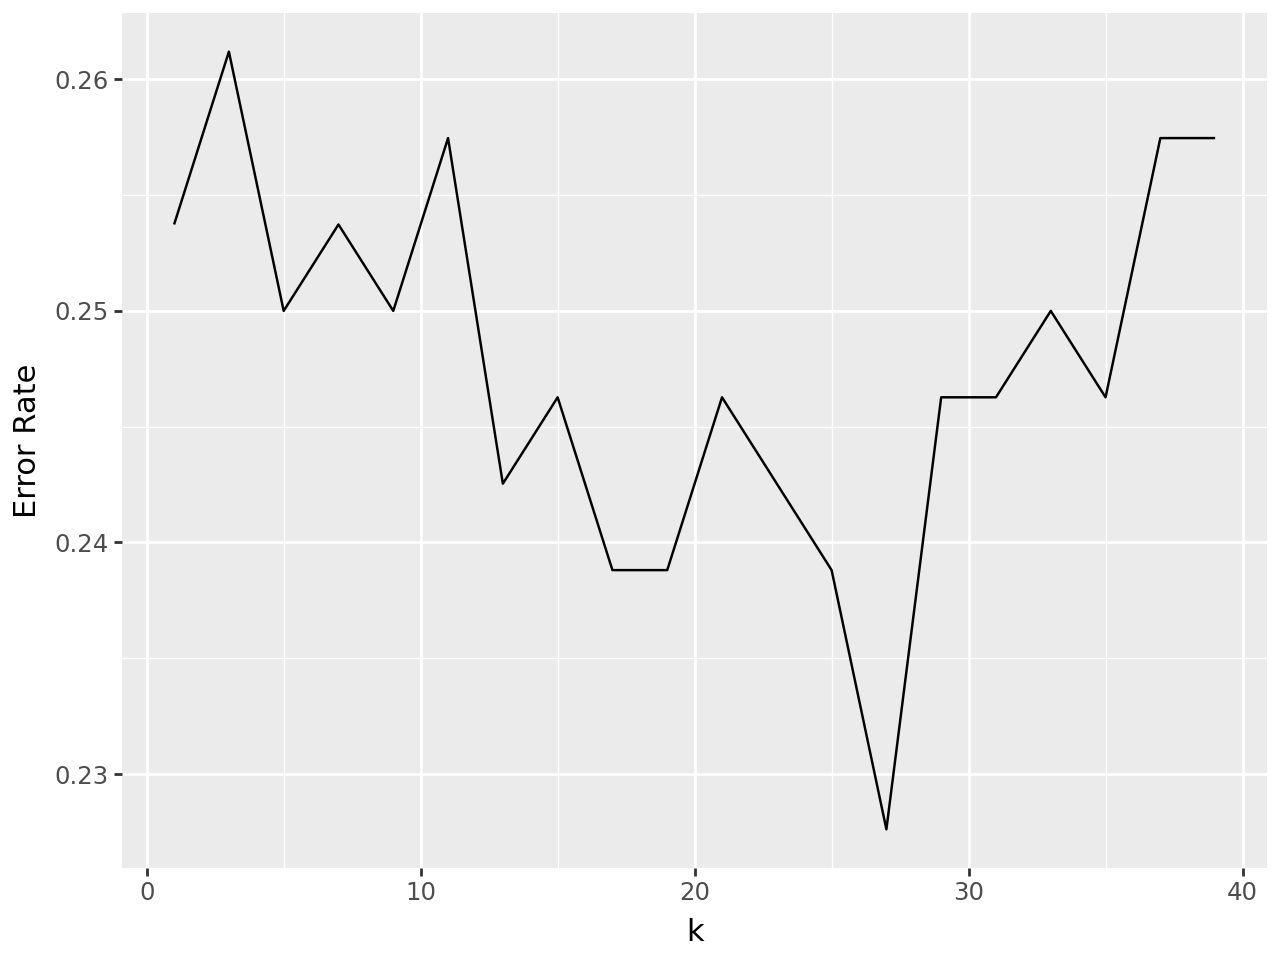

In [59]:
ks = []
error_rates = []

for k in range(1, 40, 2):
  ks.append(k)

  mod = KNeighborsClassifier(n_neighbors=k)
  mod.fit(X_train, y_train)

  #print(k, 1 - mod.score(X_test, y_test))
  error_rates.append(1 - mod.score(X_test, y_test))
learning_curve = pd.DataFrame({'k': ks, 'error_rate': error_rates})

(
  ggplot(learning_curve)
  + geom_line(aes(x='k', y='error_rate'))
  + labs(x='k', y='Error Rate')
)

## Part 3 - Slide 45

|   |                                     |            |
|---|-------------------------------------|------------|
| A | { Apple, Banana, Soymilk, Yoghurt } | Vegetarian |
| B | { Apple, Peanuts, Yoghurt }         | Vegetarian |
| C | { Tomatoes, Potatoes, Yoghurt }     | Meat-eater |
| D | { Apple, Tomatoes, Potatoes }       | Meat-eater |

Use 1-NN algorithm to predict

|   |                                     |            |
|---|-------------------------------------|------------|
| E | { Apple, Tomatoes }                  | ?          |
| F | { Yoghurt, Soymilk }                 | ?          |


|         | Similarity |
|---------|------------|
| J(E, A) |            |
| J(E, B) |            |
| J(E, C) |            |
| J(E, D) |            |

Predicted class for E:

|         | Similarity |
|---------|------------|
| J(F, A) |            |
| J(F, B) |            |
| J(F, C) |            |
| J(F, D) |            |

Predicted class for F:
